In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import nltk
import re
import pprint
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk import collocations
plt.rcParams['figure.figsize'] = [16, 6]

In [77]:
df = pd.read_csv("tweets_dataset.csv", sep=",", encoding='utf-8',index_col=0)
df

,tweet,favorite_count,retweet_count,reply_to,n_user_mentions,n_hashtags,n_urls,user_mentions,hashtags,created_at
screen_name,,,,,,,,,,
gellibert,@calleGerardo Mena,0,0,calleGerardo,1.0,0.0,0.0,calleGerardo,NaN,Sat Jun 29 00:26:14 +0000 2019
matubupe,@saramar0813 @FCFSeleccionCol Colombia con 10 ...,0,0,saramar0813,2.0,0.0,0.0,saramar0813;FCFSeleccionCol,NaN,Sat Jun 29 00:26:55 +0000 2019
LitoHeleno,DE SNAPCHAT TE BORRÉ DE FACEBOOK TE BORRÉ DE...,0,0,NaN,1.0,0.0,0.0,sanbenito,NaN,Sat Jun 29 00:27:29 +0000 2019
AlejaRamrez,💛💙❤ https://t.co/xneGeHbK8f,0,0,NaN,0.0,0.0,0.0,NaN,NaN,Sat Jun 29 00:27:34 +0000 2019
gabrielacueva,https://t.co/uDuOkZstgt,0,0,NaN,0.0,0.0,0.0,NaN,NaN,Sat Jun 29 00:27:41 +0000 2019
luimoy,Acaba de publicar un video en Guayaquil; Ecuad...,0,0,NaN,0.0,0.0,1.0,NaN,NaN,Sat Jun 29 00:28:08 +0000 2019
ccarrasco750,@xrguerrero Muchas gracias amigo; Dios lo bend...,0,0,xrguerrero,1.0,0.0,0.0,xrguerrero,NaN,Sat Jun 29 00:28:11 +0000 2019
carlosbarrenol,@PabloAndrsMart7 https://t.co/mcg5h0lrws,0,0,PabloAndrsMart7,1.0,0.0,0.0,PabloAndrsMart7,NaN,Sat Jun 29 00:28:14 +0000 2019
gabybarrezueta,@EAragundi Guanin ist schuld,0,0,EAragundi,1.0,0.0,0.0,EAragundi,NaN,Sat Jun 29 00:28:16 +0000 2019


In [78]:
stopwords_set = stopwords.words('spanish')
stopwords_set.extend(stopwords.words('english'))
stopwords_set.extend(['aquí', 'así'])
stopwords_set = set(stopwords_set)

tweets_hashtags = set([])
tweets_full_lemmas = set([])

def limpieza_tweet(tweets):
    # quitando icons
    tweet = tweets["tweet"].lower()
    sin_icons = re.sub(r'\$\w*','',tweet)
    # obteniendo palabras
    tw_Tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
    temp_tweet_list = tw_Tokenizer.tokenize(sin_icons)
    # quitando urls/direcciones
    sin_https = [re.sub(r'https?:\/\/.*\/\w*|t.co\/\w*','',i) for i in temp_tweet_list]
    # quitando hashtags
    tweets_hashtags.update(sin_https)
    sin_hashtags = [re.sub(r'#|https', '', i) for i in sin_https]
    # quitando signos de puntuación
    sin_puntuacion = [re.sub(r'[' + string.punctuation + ']+', ' ', i) for i in sin_hashtags]
    sin_puntuacion = [re.sub(r'[“’—‘”–…]+', ' ', i) for i in sin_puntuacion]
    
    new_tweet = ' '.join(sin_puntuacion)
    filtrada_palabras = tw_Tokenizer.tokenize(new_tweet)
    filtrada_palabras = [re.sub(r'^\w\w?$', '', i) for i in filtrada_palabras]
    
    filtrada =' '.join(filtrada_palabras)
    tweet_final = re.sub(r'\s\s+', ' ', filtrada)
    # quitando stopwords
    tweet_final = tweet_final.strip(' ').split(' ')
    sin_stopwords = [i for i in tweet_final if (i.lower() not in stopwords_set and len(i)>1 and not i.isdigit())]
    #obteniendo los emoticones para luego analizar
    emoticones = [i for i in tweet_final if (i.lower() not in stopwords_set and len(i)==1) ]
    # obtiendo lemas
    tweets_full_lemmas.update(sin_stopwords)
    tweets["emoticones"] = ' '.join(emoticones)
    tweets["sin_stopwords"] = ' '.join(sin_stopwords)
    return tweets

In [79]:
df = df.apply(limpieza_tweet, axis=1)

In [80]:
df

,tweet,favorite_count,retweet_count,reply_to,n_user_mentions,n_hashtags,n_urls,user_mentions,hashtags,created_at,emoticones,sin_stopwords
screen_name,,,,,,,,,,,,
gellibert,@calleGerardo Mena,0,0,calleGerardo,1.0,0.0,0.0,calleGerardo,NaN,Sat Jun 29 00:26:14 +0000 2019,,mena
matubupe,@saramar0813 @FCFSeleccionCol Colombia con 10 ...,0,0,saramar0813,2.0,0.0,0.0,saramar0813;FCFSeleccionCol,NaN,Sat Jun 29 00:26:55 +0000 2019,,colombia jugadores ayuda var empata chile ause...
LitoHeleno,DE SNAPCHAT TE BORRÉ DE FACEBOOK TE BORRÉ DE...,0,0,NaN,1.0,0.0,0.0,sanbenito,NaN,Sat Jun 29 00:27:29 +0000 2019,🎶 🔥 👁 🐰,snapchat borré facebook borré instagram borré ...
AlejaRamrez,💛💙❤ https://t.co/xneGeHbK8f,0,0,NaN,0.0,0.0,0.0,NaN,NaN,Sat Jun 29 00:27:34 +0000 2019,💛 💙 ❤,
gabrielacueva,https://t.co/uDuOkZstgt,0,0,NaN,0.0,0.0,0.0,NaN,NaN,Sat Jun 29 00:27:41 +0000 2019,,
luimoy,Acaba de publicar un video en Guayaquil; Ecuad...,0,0,NaN,0.0,0.0,1.0,NaN,NaN,Sat Jun 29 00:28:08 +0000 2019,,acaba publicar video guayaquil ecuador
ccarrasco750,@xrguerrero Muchas gracias amigo; Dios lo bend...,0,0,xrguerrero,1.0,0.0,0.0,xrguerrero,NaN,Sat Jun 29 00:28:11 +0000 2019,,muchas gracias amigo dios bendiga
carlosbarrenol,@PabloAndrsMart7 https://t.co/mcg5h0lrws,0,0,PabloAndrsMart7,1.0,0.0,0.0,PabloAndrsMart7,NaN,Sat Jun 29 00:28:14 +0000 2019,,
gabybarrezueta,@EAragundi Guanin ist schuld,0,0,EAragundi,1.0,0.0,0.0,EAragundi,NaN,Sat Jun 29 00:28:16 +0000 2019,,guanin ist schuld


In [81]:
print(len(tweets_full_lemmas))

120475


Frecuencia de palabras

In [82]:
#nltk.download('punkt')
texto = df["sin_stopwords"].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
palabras = nltk.tokenize.word_tokenize(texto, language="spanish")
distribucion = nltk.FreqDist(palabras)
frecuencia = pd.DataFrame(distribucion.most_common(25),columns=['Palabra', 'Frequencia']).set_index('Palabra')

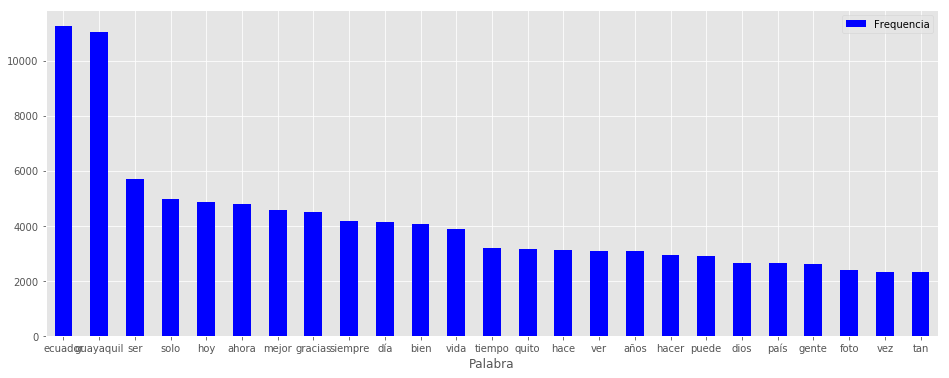

In [83]:
matplotlib.style.use('ggplot')
frecuencia.plot.bar(rot=0, color="blue")

In [84]:
distribucion.most_common(25)

[('ecuador', 11268),
 ('guayaquil', 11050),
 ('ser', 5716),
 ('solo', 4964),
 ('hoy', 4882),
 ('ahora', 4807),
 ('mejor', 4590),
 ('gracias', 4518),
 ('siempre', 4195),
 ('día', 4143),
 ('bien', 4088),
 ('vida', 3891),
 ('tiempo', 3206),
 ('quito', 3152),
 ('hace', 3133),
 ('ver', 3102),
 ('años', 3077),
 ('hacer', 2944),
 ('puede', 2896),
 ('dios', 2658),
 ('país', 2644),
 ('gente', 2639),
 ('foto', 2398),
 ('vez', 2338),
 ('tan', 2336)]

In [85]:
texto_e = df["emoticones"].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
emoticones = nltk.tokenize.word_tokenize(texto_e, language="spanish")
emoticones_distribucion = nltk.FreqDist(emoticones)
freq_emoticon = pd.DataFrame(emoticones_distribucion.most_common(25),columns=['Emoticon', 'Frequencia']).set_index('Emoticon')

In [86]:
len(emoticones_distribucion)  # cantidad de emoticones

1323

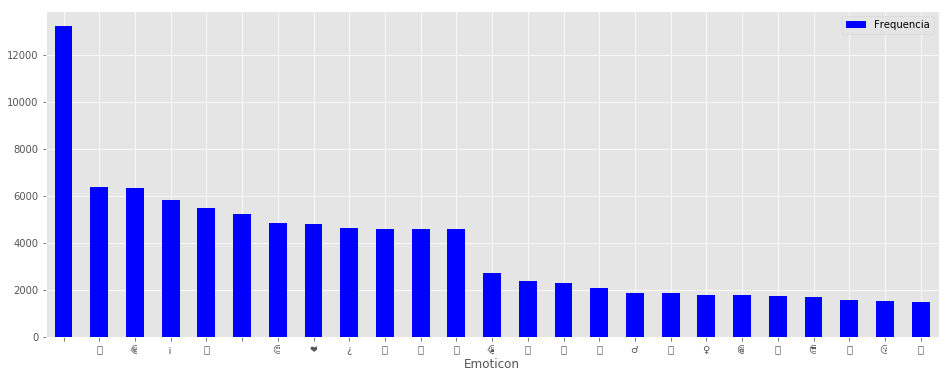

In [87]:
matplotlib.style.use('ggplot')
freq_emoticon.plot.bar(rot=0, color="blue")

In [88]:
emoticones_distribucion.most_common(25)

[('️', 13232),
 ('🏻', 6387),
 ('😂', 6353),
 ('¡', 5830),
 ('\U0001f923', 5473),
 ('\u200d', 5217),
 ('😍', 4843),
 ('❤', 4816),
 ('¿', 4642),
 ('👏', 4606),
 ('🇨', 4584),
 ('🇪', 4576),
 ('😭', 2725),
 ('🏼', 2364),
 ('🏆', 2310),
 ('🙏', 2098),
 ('♂', 1853),
 ('🔥', 1853),
 ('♀', 1775),
 ('😁', 1770),
 ('🇵', 1740),
 ('😎', 1703),
 ('🇴', 1585),
 ('😘', 1505),
 ('🎉', 1503)]

In [89]:
palabras_b = df["sin_stopwords"].apply(lambda t: t + " ").sum().strip()
palabras_lista = nltk.wordpunct_tokenize(palabras_b)

In [90]:
finder = collocations.BigramCollocationFinder.from_words(palabras_lista)
measures = collocations.BigramAssocMeasures()
finder.apply_freq_filter(4) # cambiar a 2
resultado = finder.score_ngrams(measures.raw_freq)
resultado = pd.DataFrame(data=resultado, columns=['Bigram', 'Score']).set_index('Bigram').reset_index()
resultado.head(10000)

,Bigram,Score
0,"(guayaquil, ecuador)",0.002229
1,"(acaba, publicar)",0.001049
2,"(publicar, foto)",0.001005
3,"(ahora, tendencia)",0.000790
4,"(tendencia, ecuador)",0.000553
5,"(quevedo, guayaquil)",0.000552
6,"(cuenca, quito)",0.000545
7,"(ecuador, cuenca)",0.000545
8,"(copa, américa)",0.000535
9,"(ecuador, guayaquil)",0.000506


In [91]:
resultado['origen'] = resultado.Bigram.apply(lambda x: x[0])
resultado['destino'] = resultado.Bigram.apply(lambda x: x[1])
resultado['peso'] = resultado['Score']
resultado.drop(columns=['Bigram', 'Score'], inplace=True)

In [92]:
resultado.head(10000)

,origen,destino,peso
0,guayaquil,ecuador,0.002229
1,acaba,publicar,0.001049
2,publicar,foto,0.001005
3,ahora,tendencia,0.000790
4,tendencia,ecuador,0.000553
5,quevedo,guayaquil,0.000552
6,cuenca,quito,0.000545
7,ecuador,cuenca,0.000545
8,copa,américa,0.000535
9,ecuador,guayaquil,0.000506


In [93]:
resultado.head(100)[["origen","destino","peso"]].to_csv('grafo_data.csv', index=False)

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = [word for word in stopwords.words('spanish')]

In [95]:
tfidf_vector = TfidfVectorizer(max_features=1000, stop_words=stopwords, use_idf=True, ngram_range=(1,3))

In [96]:
tfidf_matrix = tfidf_vector.fit_transform(df["sin_stopwords"].tolist())

In [97]:
terms = tfidf_vector.get_feature_names()
terms

['2do',
 'abrazo',
 'acaba',
 'acaba publicar',
 'acaba publicar foto',
 'acabo',
 'acaso',
 'acciones',
 'acuerdo',
 'acá',
 'adelante',
 'además',
 'agosto',
 'agua',
 'ahora',
 'ahora tendencia',
 'ahora tendencia ecuador',
 'ahora tendencia guayaquil',
 'ahí',
 'alcalde',
 'alegría',
 'alguien',
 'alguna',
 'algún',
 'allá',
 'alma',
 'alto',
 'amarilla',
 'ambato',
 'amen',
 'america',
 'amiga',
 'amigo',
 'amigos',
 'amo',
 'amor',
 'amén',
 'américa',
 'anda',
 'apoyo',
 'aprender',
 'aqui',
 'arena',
 'argentina',
 'arriba',
 'arte',
 'asamblea',
 'asco',
 'asesora',
 'asesora barbara',
 'asesora barbara azuay',
 'asi',
 'atención',
 'atrás',
 'aun',
 'aunque',
 'autoridades',
 'ayer',
 'ayuda',
 'azuay',
 'azuay bolivar',
 'azuay bolivar cañar',
 'año',
 'años',
 'aún',
 'bajo',
 'banco',
 'banda',
 'barbara',
 'barbara azuay',
 'barbara azuay bolivar',
 'barcelona',
 'barra',
 'barra dance',
 'basta',
 'basura',
 'baño',
 'bella',
 'belleza',
 'bello',
 'bendiciones',
 'bendi

In [98]:
from sklearn.cluster import KMeans

In [115]:
num_clusters = 10

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [116]:
clusters

[0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,


In [117]:
data = {'doc_id': df.index.tolist(), 'doc': df["sin_stopwords"].tolist(), 'cluster': clusters}

In [118]:
frame = pd.DataFrame(data, index = [clusters] , columns = ['doc_id', 'doc','cluster'])

In [119]:
frame['cluster'].value_counts()

0    180695
5      5186
8      3521
3      3406
1      1558
7       823
2       790
9       680
4       582
6       243
Name: cluster, dtype: int64

In [120]:
frame[frame["cluster"] == 1]

,doc_id,doc,cluster
1,luimoy,acaba publicar video guayaquil ecuador,1
1,MaferTorres_Spa,acaba publicar video urdesa,1
1,rafael_melgar,acaba publicar foto búnker discotek pag,1
1,artemio159159,acaba publicar foto guayas province,1
1,eduvic25,acaba publicar foto malecón,1
1,eduvic25,acaba publicar foto rotonda,1
1,JoseriofrioIng,acaba publicar foto casa,1
1,JoseriofrioIng,acaba publicar foto casa,1
1,erwinghu70,acaba publicar foto ecuador guayaquil,1
1,JoseriofrioIng,acaba publicar foto casa,1


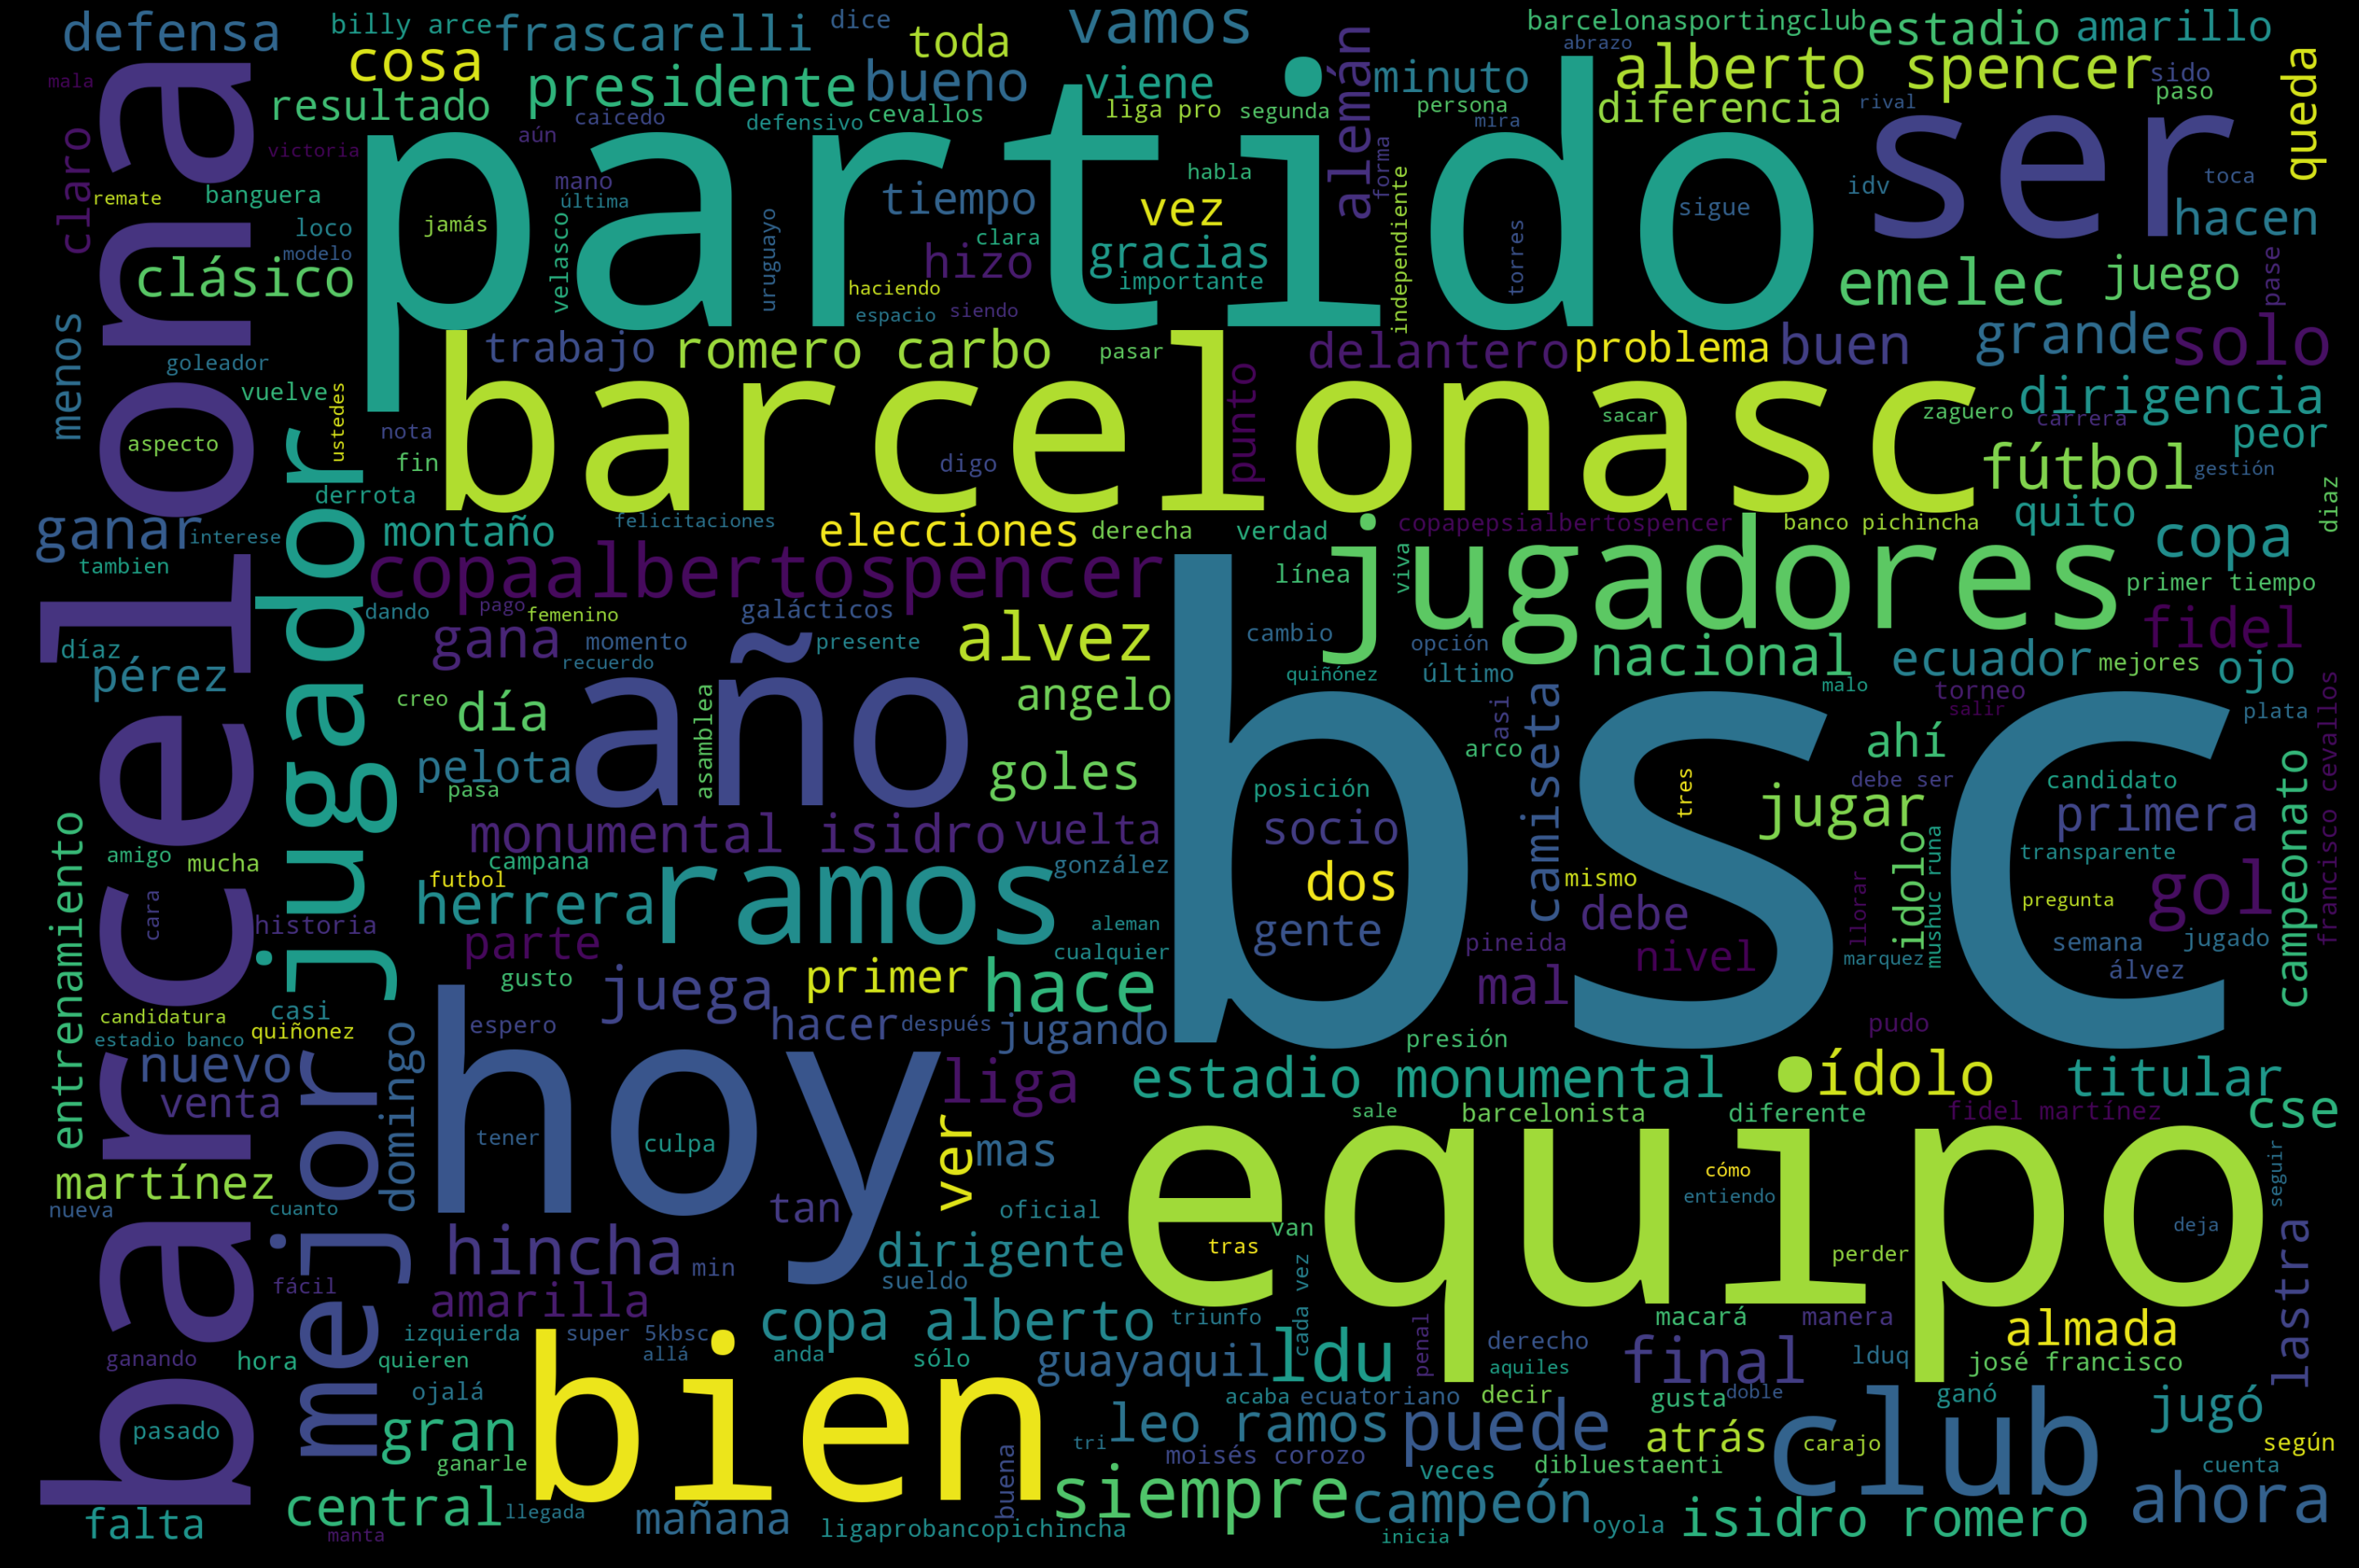

In [127]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=300,
    stopwords = STOPWORDS).generate(frame[frame["cluster"] == 4]["doc"].str.lower().str.replace(r'\|', ' ').str.cat(sep=' '))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [122]:
palabras_b = frame[frame["cluster"] == 0]["doc"].apply(lambda t: t + " ").sum().strip()
palabras_lista = nltk.wordpunct_tokenize(palabras_b)
finder = collocations.BigramCollocationFinder.from_words(palabras_lista)
measures = collocations.BigramAssocMeasures()
finder.apply_freq_filter(4) # cambiar a 2
resultado = finder.score_ngrams(measures.raw_freq)
resultado = pd.DataFrame(data=resultado, columns=['Bigram', 'Score']).set_index('Bigram').reset_index()
resultado.head(10000)
resultado['origen'] = resultado.Bigram.apply(lambda x: x[0])
resultado['destino'] = resultado.Bigram.apply(lambda x: x[1])
resultado['peso'] = resultado['Score']
resultado.drop(columns=['Bigram', 'Score'], inplace=True)
resultado.head(200)[["origen","destino","peso"]].to_csv('grafo_data.csv', index=False)

In [106]:
vocab_frame = pd.DataFrame({'words': tweets_full_lemmas}, index = tweets_full_lemmas)

In [107]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :10]:
        try:
            print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
        except:
            continue
    print("Cluster %d docs:" % i, end='')
    for title in frame.iloc[i]['doc'].split(' '):
        print(' %s,' % title, end='')
    print() #add whitespace

Cluster 0 words:Cluster 0 docs: mena,
Cluster 1 words:Cluster 1 docs: colombia, jugadores, ayuda, var, empata, chile, ausencia, cuadrado,
Cluster 2 words:Cluster 2 docs: snapchat, borré, facebook, borré, instagram, borré, vida, borré,
Cluster 3 words:Cluster 3 docs: ,
Cluster 4 words:Cluster 4 docs: ,
Cluster 5 words:Cluster 5 docs: acaba, publicar, video, guayaquil, ecuador,
Cluster 6 words:Cluster 6 docs: muchas, gracias, amigo, dios, bendiga,
